In [1]:
import pandas as pd
import requests
import json
response = requests.get('https://api.covid19india.org/csv/latest/state_wise.csv')
response_df = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise.csv')
print (response.status_code)
#print (response.content)
# response.content is in byte form. Let's convert it to string
response_string = response.content.decode('utf-8')
response_string_json = json.dumps(response_string)
#print (type(response))
#print (response_string_json)
print (response_df)
response_df_prep = response_df.copy()

200
                                       State  Confirmed  Recovered  Deaths  \
0                                      Total    5517601    4432630   88231   
1                                Maharashtra    1208642     884341   32671   
2                                 Tamil Nadu     547337     491971    8871   
3                             Andhra Pradesh     631749     551821    5410   
4                                  Karnataka     526876     423377    8145   
5                                      Delhi     246711     209632    4982   
6                              Uttar Pradesh     354275     283274    5047   
7                                West Bengal     225137     195972    4359   
8                                      Bihar     169856     155824     870   
9                                  Telangana     172608     141930    1042   
10                                   Gujarat     123337     103875    3320   
11                                     Assam     156680     

In [2]:
response_df_prep1 = response_df_prep[['State', 'Confirmed', 'Recovered', 'Deaths']]
response_df_prep2 = response_df_prep1.replace('Total', 'India')
response_df_prep2

,State,Confirmed,Recovered,Deaths
0,India,3681073,2834973,65427
1,Maharashtra,792541,573559,24583
2,Tamil Nadu,428041,368141,7323
3,Andhra Pradesh,434771,330526,3969
4,Karnataka,342423,249467,5702
5,Delhi,174748,155678,4444
6,Uttar Pradesh,230414,172140,3486
7,West Bengal,162778,134270,3228
8,Bihar,136337,119572,694
9,Telangana,124963,92837,827


In [3]:
response_df_prep2['%ofRecovery'] = response_df_prep['Recovered']/response_df_prep['Confirmed']* 100
response_df_prep2['%ofRecovery']

0     77.014854
1     72.369631
2     86.006013
3     76.023010
4     72.853459
5     89.087143
6     74.709002
7     82.486577
8     87.703265
9     74.291590
10    80.761134
11    79.345781
12    81.784241
13    74.646500
14    81.369338
15    76.068162
16    68.366386
17    68.578678
18    76.966948
19    68.812280
20    54.460651
21    68.633681
22    77.948100
23    63.835452
24    64.769967
25    69.257837
26    73.136037
27    77.417722
28    70.160506
29    83.311856
30    66.603487
31    55.936493
32    87.917195
33    49.070946
34    74.152542
35    58.259149
36          NaN
37          NaN
Name: %ofRecovery, dtype: float64

In [4]:
response_df_prep3 = response_df_prep2.sort_values(by = '%ofRecovery', ascending = False)
Percentage_of_Recovery = response_df_prep3[['State', '%ofRecovery']]
#Let's Drop NaN value from the table
Percentage_of_Recovery1 = Percentage_of_Recovery.dropna(axis = 0)
Percentage_of_Recovery1

,State,%ofRecovery
5,Delhi,89.087143
32,Dadra and Nagar Haveli and Daman and Diu,87.917195
8,Bihar,87.703265
2,Tamil Nadu,86.006013
29,Andaman and Nicobar Islands,83.311856
7,West Bengal,82.486577
12,Rajasthan,81.784241
14,Haryana,81.369338
10,Gujarat,80.761134
11,Assam,79.345781


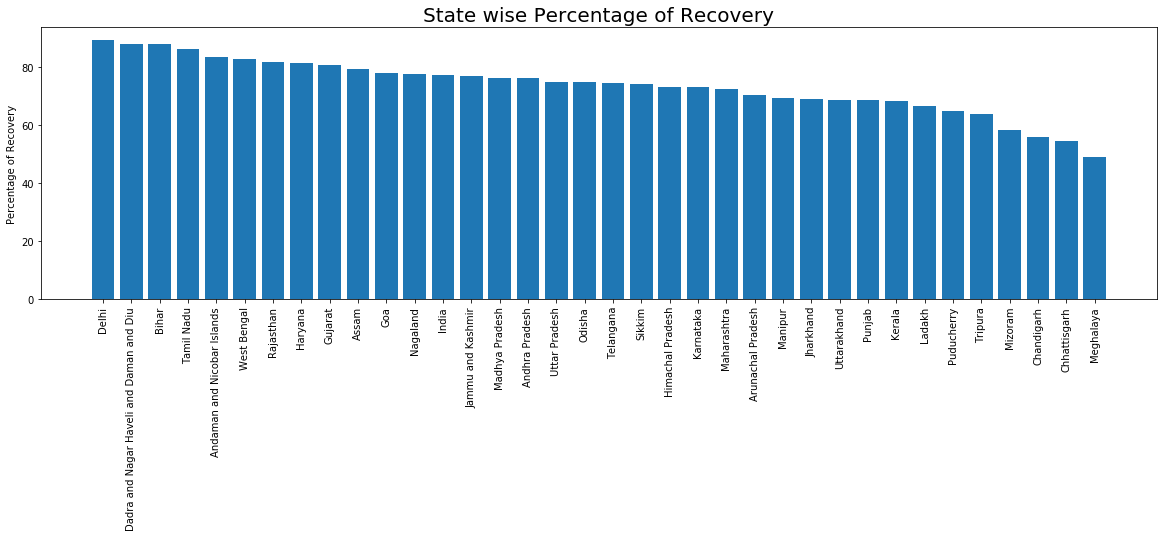

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize= (20,5))
plt.title('State wise Percentage of Recovery', fontsize = 20)
plt.ylabel('Percentage of Recovery')
plt.bar(Percentage_of_Recovery1['State'],Percentage_of_Recovery1['%ofRecovery'] )
plt.xticks(rotation = 90)
plt.show()

In [6]:
import flask

app = flask.Flask(__name__)
app.config["DEBUG"] = True


@app.route('/', methods=['GET'])
def home():
    return "<h1>Distant Reading Archive</h1><p>This site is a prototype API for distant reading of science fiction novels.</p>"

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

C:\Users\dppalai\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3327: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
